# LGMVIP Data Science Internship task 2 - September

*  **Stock market prediction and forecasting using stacked LSTM**



Done by
P.Abhiram Reddy

### Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
df = pd.read_csv('NSE-TATAGLOBA-train.csv')

In [ ]:
train_data = df.iloc[:, 5:6].values

In [ ]:
train_data.shape

(2035, 1)

In [ ]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train_data)

In [ ]:
train_scaled

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
for i in range(70, 2035):
    X_train.append(train_scaled[i-70:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1965, 70)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1965, 70, 1)

###Building LSTM

In [ ]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 65, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.20))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 65, return_sequences = True))
model.add(Dropout(0.20))

In [ ]:

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 65, return_sequences = True))
model.add(Dropout(0.20))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60))
model.add(Dropout(0.20))


In [ ]:
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 16)



Epoch 1/100
123/123 [==============================] - 9s 14ms/step - loss: 0.0077
Epoch 2/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0030
Epoch 3/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0026
Epoch 4/100
123/123 [==============================] - 2s 13ms/step - loss: 0.0022
Epoch 5/100
123/123 [==============================] - 2s 16ms/step - loss: 0.0021
Epoch 6/100
123/123 [==============================] - 2s 18ms/step - loss: 0.0020
Epoch 7/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0019
Epoch 8/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0016
Epoch 9/100
123/123 [==============================] - 2s 13ms/step - loss: 0.0015
Epoch 10/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0014
Epoch 11/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 12/100
123/123 [==============================] - 2s 15ms/step - loss: 0.0014
E

### Making the predictions and visualising the result

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('TATAGLOBAL-test.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(70, 86):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 1s 1s/step


###Visualising

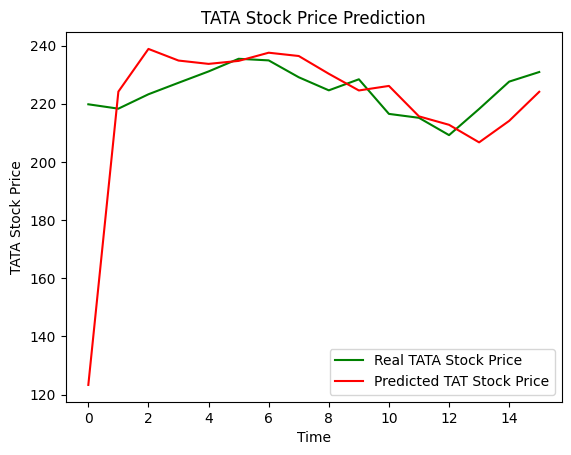

In [ ]:
plt.plot(real_stock_price, color = 'green', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()